<a href="https://colab.research.google.com/github/Atharva-Karhale/Singular-Value-Decomposition-SVD-for-image-compression-and-analysis/blob/main/svd_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Using user-provided image file ---
Image loaded and resized. Matrix A has shape: (150, 100)


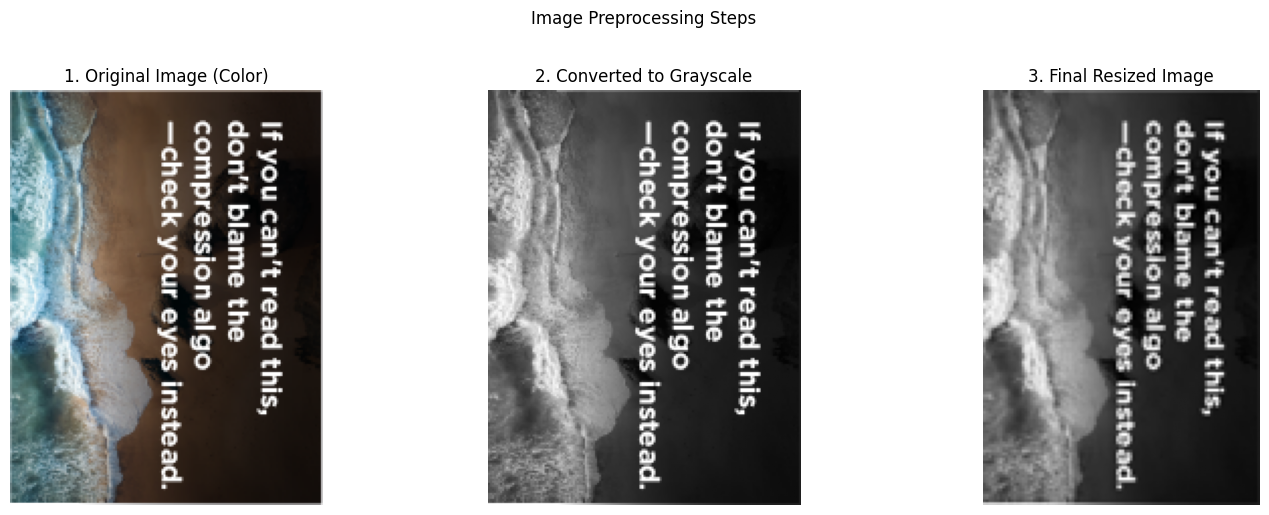

--- Part (a) Outputs ---
Singular Values (top 10):
[12437.54304132  2463.53016076  1986.79094889  1708.0955795
  1431.06614417  1319.15599937   969.4659866    911.13346853
   881.88182653   822.49828608]

Shape of U: (150, 150)
Shape of S (singular values): (100,)
Shape of Vt: (100, 100)
------------------------------

--- Part (b) Outputs (Reconstruction) ---
Generating and displaying images for k values: [5, 10, 20, 40, 60]


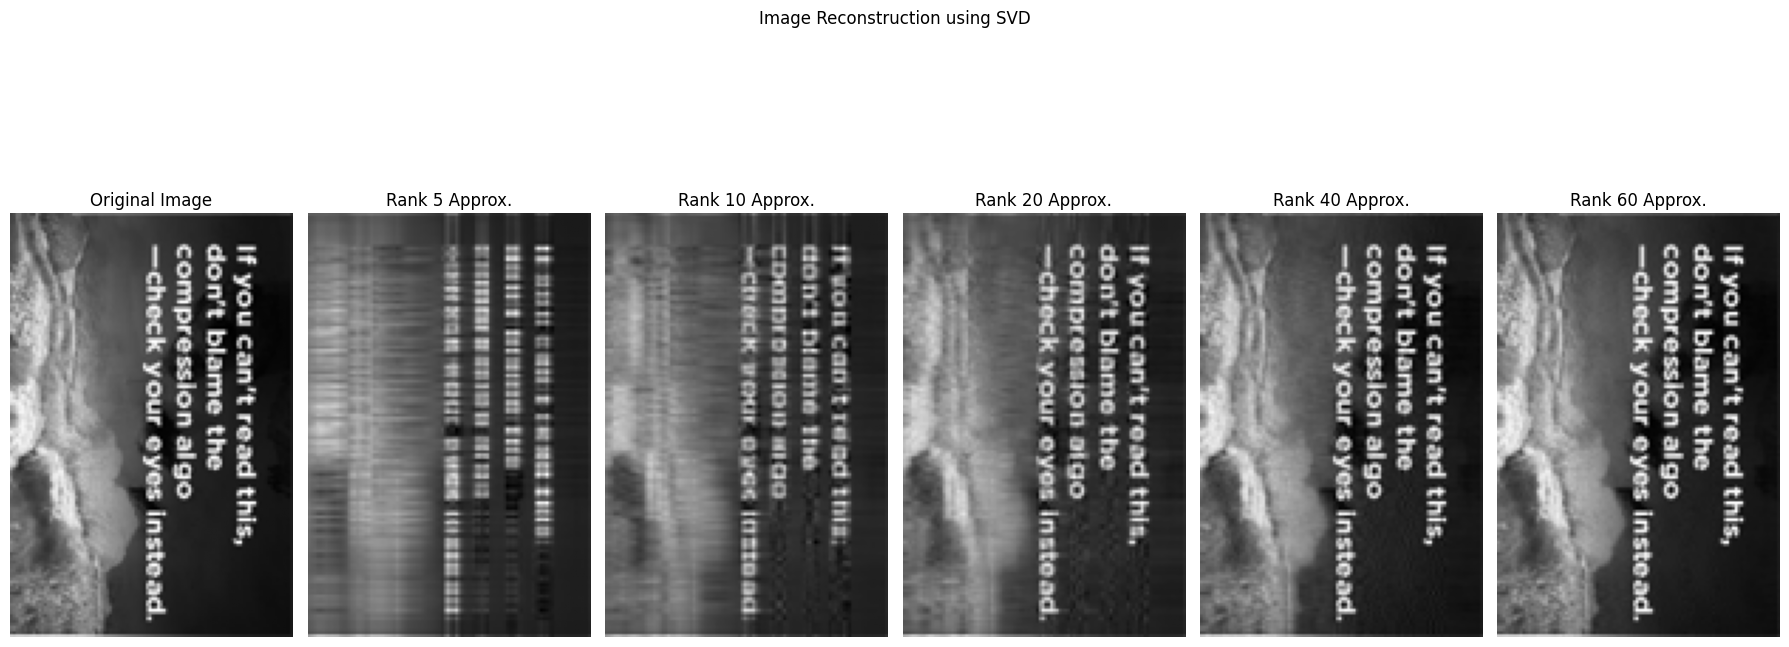


--- Part (c) Outputs (Error Analysis) ---
Computed Frobenius norms of reconstruction error (rounded to 8 decimals):
  k = 5: 3275.06521309
  k = 10: 2400.34000011
  k = 20: 1383.42667463
  k = 40: 534.06941033
  k = 60: 187.93796152


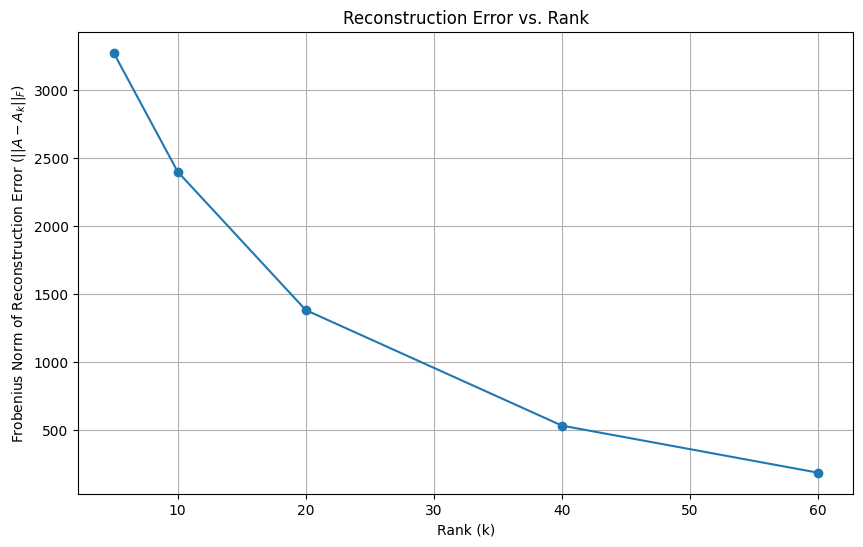


--- Part (d) Outputs (Energy Preservation) ---
Computed proportion of energy preserved (rounded to 8 decimals):
  k = 5: 0.94054308
  k = 10: 0.96806198
  k = 20: 0.98939099
  k = 40: 0.99841891
  k = 60: 0.99980421


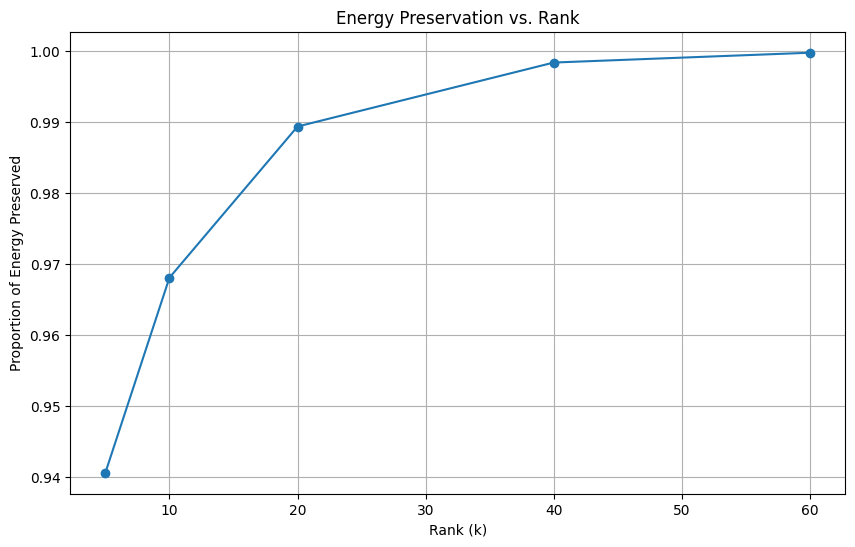

In [ ]:
# This script performs Singular Value Decomposition (SVD) for a grayscale
# image and demonstrates image compression, error analysis, and energy preservation.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# --- Q2: Singular Value Decomposition (SVD) for Image Compression ---

# The problem considers a grayscale image represented as a matrix A of size 150x100.
# We will first try to load a user-provided image and resize it.
# As a fallback, we will generate a dummy matrix if the image file is not found.

# Set the path to your image file here
image_path = 'User_Image.png'
A = None
original_color_image = None

if os.path.exists(image_path):
    print("--- Using user-provided image file ---")
    try:
        # Load the image
        original_color_image = Image.open(image_path)

        # Convert to grayscale ('L' mode)
        grayscale_image = original_color_image.convert('L')

        # Resize the grayscale image to the required dimensions (100 width x 150 height)
        # Note: PIL uses (width, height), so we specify (100, 150)
        resized_image = grayscale_image.resize((100, 150))

        # Convert the resized image to a NumPy array, which serves as our matrix A
        A = np.array(resized_image)
        print(f"Image loaded and resized. Matrix A has shape: {A.shape}")

        # Display the image conversion steps
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(original_color_image)
        plt.title('1. Original Image (Color)')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(grayscale_image, cmap='gray')
        plt.title('2. Converted to Grayscale')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(A, cmap='gray')
        plt.title('3. Final Resized Image')
        plt.axis('off')

        plt.suptitle('Image Preprocessing Steps', y=1.02)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error loading or processing image: {e}")
        print("Falling back to a randomly generated matrix.")
        A = None # Fallback trigger

# If A is still None (either file not found or error occurred), generate a random matrix
if A is None:
    print("--- No image file found or error occurred. Generating random matrix ---")
    # We set a random seed for reproducibility.
    np.random.seed(42)
    A = np.random.randint(0, 256, size=(150, 100), dtype=np.uint8)

# --- Part (a): Perform SVD ---

# Compute the Singular Value Decomposition of A.
# The numpy.linalg.svd function returns U, a 1D array of singular values S, and Vt.
# A = U * S * Vt (in matrix form).
U, S, Vt = np.linalg.svd(A)

print("--- Part (a) Outputs ---")
print("Singular Values (top 10):")
# Round the singular values to 8 decimals as per assignment instructions
print(np.round(S[:10], 8))
print("\nShape of U:", U.shape)
print("Shape of S (singular values):", S.shape)
print("Shape of Vt:", Vt.shape)
print("-" * 30)

# --- Part (b): Reconstruction with Multiple Ranks ---

k_values = [5, 10, 20, 40, 60]

# Set up the plot for displaying the images side-by-side
plt.figure(figsize=(18, 8))

# Display the original image first
plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(A, cmap='gray')
plt.title('Original Image')
plt.axis('off')

print("\n--- Part (b) Outputs (Reconstruction) ---")
print("Generating and displaying images for k values:", k_values)

# Loop through each k to perform reconstruction
for i, k in enumerate(k_values):
    # Take the top-k singular values from S and create a diagonal matrix
    S_k = np.diag(S[:k])

    # Take the first k columns of U
    U_k = U[:, :k]

    # Take the first k rows of Vt
    Vt_k = Vt[:k, :]

    # Reconstruct the matrix A_k
    A_k = U_k @ S_k @ Vt_k

    # Display the reconstructed image in a subplot
    plt.subplot(1, len(k_values) + 1, i + 2)
    plt.imshow(A_k, cmap='gray')
    plt.title(f'Rank {k} Approx.')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Image Reconstruction using SVD', y=1.02)
plt.show()


# --- Part (c): Error Analysis ---

# Compute the Frobenius norm of reconstruction error for each k
# The error E_k is equal to the square root of the sum of the squared
# singular values that were truncated (S[k:]).
error_values = []
for k in k_values:
    # Get the singular values that were not used
    S_truncated = S[k:]
    # Compute the Frobenius norm of the error
    error = np.sqrt(np.sum(S_truncated**2))
    error_values.append(error)

print("\n--- Part (c) Outputs (Error Analysis) ---")
print("Computed Frobenius norms of reconstruction error (rounded to 8 decimals):")
for i, k in enumerate(k_values):
    print(f"  k = {k}: {np.round(error_values[i], 8)}")

# Plot the reconstruction error as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_values, marker='o', linestyle='-')
plt.xlabel('Rank (k)')
plt.ylabel('Frobenius Norm of Reconstruction Error ($||A-A_k||_F$)')
plt.title('Reconstruction Error vs. Rank')
plt.grid(True)
plt.show()


# --- Part (d): Energy Preservation ---

# Compute the proportion of energy preserved for each k
# Energy(k) = (sum of squares of top k singular values) / (sum of squares of all singular values)
energy_values = []
total_energy = np.sum(S**2)

for k in k_values:
    preserved_energy = np.sum(S[:k]**2)
    proportion = preserved_energy / total_energy
    energy_values.append(proportion)

print("\n--- Part (d) Outputs (Energy Preservation) ---")
print("Computed proportion of energy preserved (rounded to 8 decimals):")
for i, k in enumerate(k_values):
    print(f"  k = {k}: {np.round(energy_values[i], 8)}")

# Plot the energy preservation as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, energy_values, marker='o', linestyle='-')
plt.xlabel('Rank (k)')
plt.ylabel('Proportion of Energy Preserved')
plt.title('Energy Preservation vs. Rank')
plt.grid(True)
plt.show()